# Mapa Auto Orgamizavel de Tipos de Vinhos

In [23]:
from minisom import MiniSom
import pandas as pd 

In [24]:
base = pd.read_csv("wines.csv")

In [25]:
base.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
# Pegando os atribultos previsores para gerar o mapa
x_base = base.iloc[:, 1:14].values

In [27]:
# pegando o a classe
y = base.iloc[:, 0].values

 # Normalizando os atributos 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
normalizador = MinMaxScaler(feature_range = (0, 1))
x = normalizador.fit_transform(x_base)

In [30]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)

In [31]:
# Inicialização dos pesos 
som.random_weights_init(x)

In [32]:
# Treinando o mapa auto organizado
som.train_random(data = x, num_iteration = 100)

In [33]:
som._weights

array([[[0.41619617, 0.39449386, 0.50685798, 0.4422608 , 0.28651455,
         0.62779354, 0.50350414, 0.5263484 , 0.54477405, 0.19242564,
         0.67435595, 0.63823686, 0.28429463],
        [0.72914786, 0.57451979, 0.52076754, 0.31312334, 0.38252807,
         0.62951827, 0.53988429, 0.23959452, 0.4316248 , 0.29844888,
         0.37657397, 0.72298876, 0.47053241],
        [0.53371796, 0.32082308, 0.51228125, 0.37102385, 0.25630737,
         0.44474728, 0.24429873, 0.66662266, 0.3169272 , 0.33613626,
         0.26874899, 0.34012126, 0.33540481],
        [0.28051343, 0.34827867, 0.83688038, 0.7920189 , 0.41270368,
         0.60188459, 0.75799137, 0.68549201, 0.42792331, 0.3603494 ,
         0.35878113, 0.70381793, 0.17784128],
        [0.58224813, 0.24425604, 0.54544019, 0.43512895, 0.31209432,
         0.43000405, 0.42551836, 0.58164702, 0.43839386, 0.20401329,
         0.59252411, 0.53116227, 0.40113876],
        [0.2678605 , 0.33046249, 0.48202195, 0.54613877, 0.20415451,
         0.

In [34]:
som._activation_map

array([[1.01875531, 1.10132912, 1.19866488, 1.40142351, 1.00705757,
        1.00729422, 1.02790339, 1.3191834 ],
       [1.27769625, 1.06089328, 1.09905025, 1.38558857, 1.17897137,
        1.09506616, 1.13952606, 1.07530871],
       [1.03590066, 1.09911785, 1.06776071, 1.12662746, 0.94804238,
        1.03776935, 1.07421396, 1.15995304],
       [0.95989401, 1.08160766, 1.08224608, 1.11256251, 1.1814428 ,
        1.3585863 , 0.96833328, 0.96678035],
       [1.19789377, 1.08917309, 1.04282663, 0.96058684, 1.26527795,
        1.20642795, 0.97870479, 1.00570549],
       [0.81107365, 0.86585837, 0.88651701, 0.84704386, 1.43930838,
        1.35380316, 1.0214357 , 1.157416  ],
       [1.3460159 , 0.84860074, 0.79616552, 1.00829361, 1.23153114,
        0.96697443, 0.86562016, 0.95414742],
       [0.9546346 , 0.91339806, 1.21402751, 1.07032451, 1.18476395,
        1.22011074, 0.9766536 , 0.84369113]])

In [35]:
q = som.activation_response(x)

In [36]:
q

array([[ 2.,  6.,  0.,  1.,  1.,  0.,  2.,  1.],
       [ 8.,  1.,  0., 11.,  3.,  5.,  0.,  2.],
       [ 3.,  5.,  0.,  0.,  3.,  4.,  1.,  4.],
       [ 2.,  0.,  4.,  0.,  1.,  3.,  4.,  2.],
       [10.,  0.,  2.,  1.,  1.,  4.,  1.,  3.],
       [ 2.,  1.,  4.,  2.,  8.,  8.,  3.,  1.],
       [ 2.,  1.,  3.,  0.,  1.,  4.,  6.,  9.],
       [ 3.,  4.,  0.,  1.,  5.,  3.,  2.,  4.]])

In [37]:
from matplotlib.pylab import pcolor, colorbar, plot

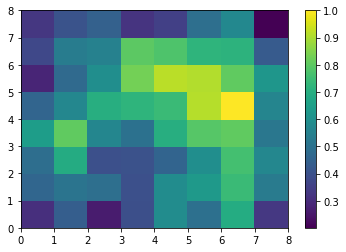

In [38]:
pcolor(som.distance_map().T)
# MID - mean inter neuron distance

colorbar()

In [39]:
w = som.winner(x[1])
w

(3, 6)

In [40]:
markers = ["o", "s", "D"]

In [41]:
color = ["r", "g", "b"]

In [42]:
#y [y == 1] = 0
#y [y == 2] = 1
#y [y == 3] = 2

IndexError: list index out of range

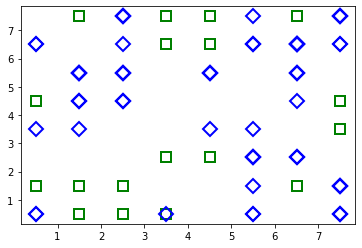

In [43]:
for i, x in enumerate(x):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = "None", markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)